## Exploratory Data Analysis
Data file link: https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset <br>
<p>
    
If this is new material or you need review, I highly recommend reading Think Stats by Allen Downey. This material is modeled after that book. <br>
<p>
It's available for free on his website. <br>
Link: http://greenteapress.com/thinkstats/index.html
<p>
Other useful links: https://www.dataquest.io/blog/jupyter-notebook-tips-tricks-shortcuts/

In [1]:
from collections import Counter, defaultdict, OrderedDict

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

In [2]:
credit_data = pd.read_csv('UCI_Credit_Card.csv')

In [3]:
credit_data.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

### 1. Histograms

In [4]:
# find age of individuals

# Method 1 (dict)
ages_1 = Counter(credit_data.AGE)
ages_1 = sorted(dict(ages_1).items())

# Method 2 (array)
ages = credit_data.AGE.value_counts().sort_index()

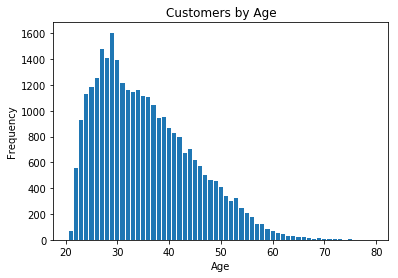

In [5]:
# print graph
plt.bar(ages.index, ages)
plt.title('Customers by Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [6]:
age_list = sorted(set(credit_data.AGE))

Instead of typing the same thing to display a bar/histogram for each customer characteristic, let's write a function.

In [7]:
def print_hist(df, col, *args):
    """Print a bar chart with category and frequency
    
    Args:
        df: dataframe
        col: column string
        *args: title, x label, y label
    """
    df_col = df[col].value_counts().sort_index()
    
    plt.bar(df_col.index, df_col)
    
    try: # title option
        plt.title(args[0])
    except IndexError:
        pass
    try: # x-axis label option
        plt.xlabel(args[1])
    except IndexError:
        pass 
    try: # y-axis label option
        plt.ylabel(args[2])
    except IndexError:
        pass
    plt.show()

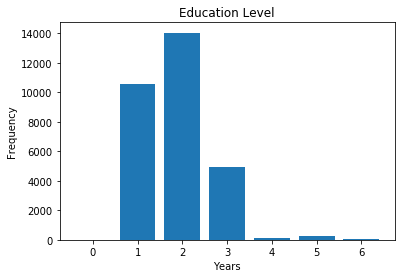

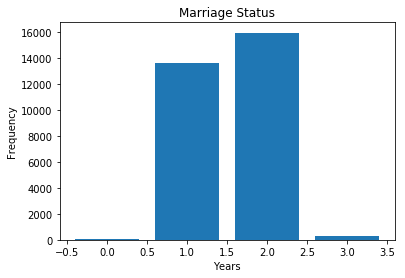

In [8]:
print_hist(credit_data, 'EDUCATION', 'Education Level', 'Years', 'Frequency')
print_hist(credit_data, 'MARRIAGE', 'Marriage Status', 'Years', 'Frequency')

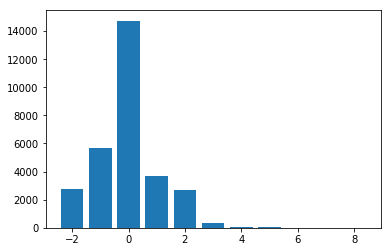

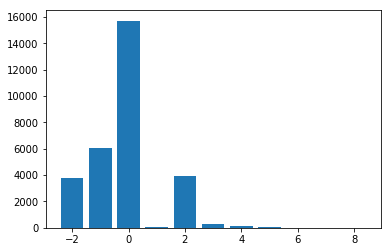

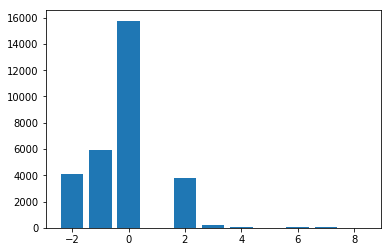

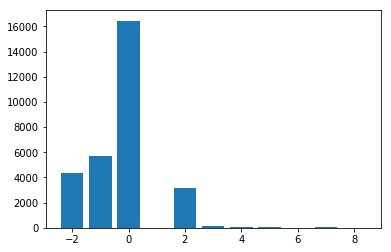

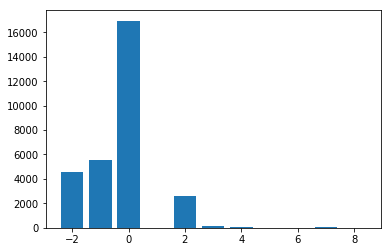

In [9]:
print_hist(credit_data, 'PAY_0')
print_hist(credit_data, 'PAY_2')
print_hist(credit_data, 'PAY_3')
print_hist(credit_data, 'PAY_4')
print_hist(credit_data, 'PAY_5')

This function doesn't work for the credit limit column. Let's try another way.

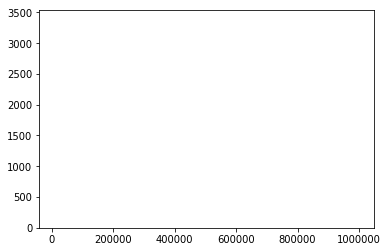

In [10]:
print_hist(credit_data, 'LIMIT_BAL')

In [11]:
# How many unique income values are there?
len(set(credit_data['LIMIT_BAL']))

81

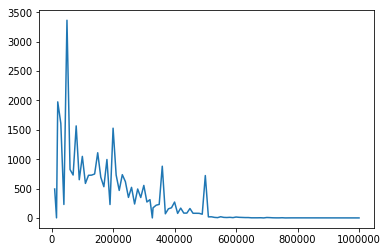

In [12]:
plt.plot(credit_data['LIMIT_BAL'].value_counts().sort_index())
plt.show()
# That works

In [13]:
d = credit_data['LIMIT_BAL'].value_counts().sort_index().reset_index()

In [14]:
d.head()

,index,LIMIT_BAL
0,10000.0,493
1,16000.0,2
2,20000.0,1976
3,30000.0,1610
4,40000.0,230


<BarContainer object of 81 artists>

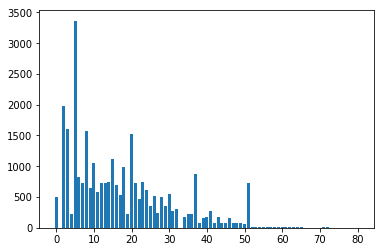

In [15]:
plt.bar(d.index, d.LIMIT_BAL)

Let's move on for now and focus on a couple categories.

### 2. Summary Statistics (NumPy)

In [16]:
age_values = credit_data.AGE
print('mean: %.4f' % np.mean(age_values))
print('median: %.4f' % np.median(age_values))
print('var: %.4f'  % np.var(age_values))
print('std: %.4f'  % np.std(age_values))

mean: 35.4855
median: 34.0000
var: 84.9669
std: 9.2178


In [17]:
credit_limit = credit_data.LIMIT_BAL
print('mean: %.2f' % np.mean(credit_limit))
print('median: %.2f' % np.median(credit_limit))
print('var: %.2f'  % np.var(credit_limit))
print('std: %.2f'  % np.std(credit_limit))

mean: 167484.32
median: 140000.00
var: 16833894533.63
std: 129745.50


In [18]:
# Faster method
credit_data.AGE.describe()

count    30000.000000
mean        35.485500
std          9.217904
min         21.000000
25%         28.000000
50%         34.000000
75%         41.000000
max         79.000000
Name: AGE, dtype: float64

In [19]:
# Faster method
credit_data.LIMIT_BAL.describe()

count      30000.000000
mean      167484.322667
std       129747.661567
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: LIMIT_BAL, dtype: float64

### 3. Empirical cumulative distribution functions (ECDF)

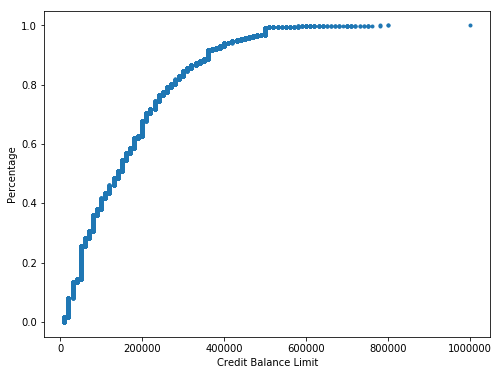

In [20]:
# Plot the ecdf using more customization
x = np.sort(credit_limit)
y = np.arange(1, len(x)+1) / len(x)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 6))
ax = plt.plot(x, y, marker='.', linestyle='none')
ax = plt.xlabel('Credit Balance Limit')
ax = plt.ylabel('Percentage')

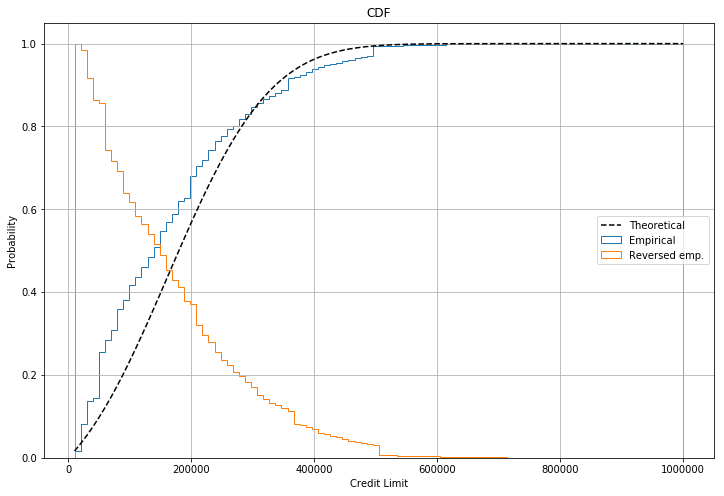

In [21]:
# A more informative cumulative distribution graph
# Comment out sections of the code to see what each does individually
mean = np.mean(credit_limit)
std = np.std(credit_limit)

# *SECTION 1*
# create an empty chart
fig, ax = plt.subplots(figsize=(12, 8))
# plot the standard cdf (and pull data for other graph)
n, bins, patches = ax.hist(x, bins=100, density=True, histtype='step',
                           cumulative=True, label='Empirical')

# *SECTION 2*
# create a function that linearizes the cdf
line = ((1 / (np.sqrt(2 * np.pi) * std)) *
     np.exp(-0.5 * (1 / std * (bins - mean))**2))
line = line.cumsum()
line /= line[-1]
#plot the linearization
ax.plot(bins, line, 'k--', linewidth=1.5, label='Theoretical')

# *SECTION 3*
ax.hist(x, bins=bins, density=True, histtype='step', cumulative=-1,
        label='Reversed emp.')

# Labels
ax.grid(True)
ax.legend(loc='center right')
ax.set_title('CDF')
ax.set_xlabel('Credit Limit')
ax.set_ylabel('Probability')

plt.show()

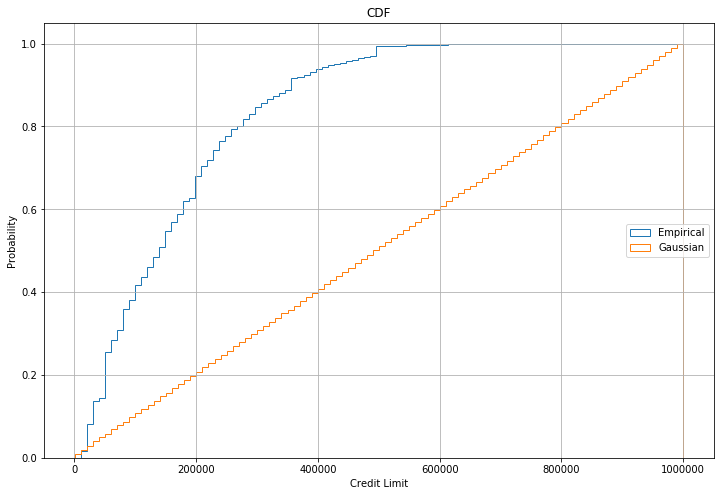

In [22]:
# Overlap a Gaussian distribution to compare
credit_limit_normed = np.random.rand(len(credit_limit)) * np.max(credit_limit)

fig, ax = plt.subplots(figsize=(12, 8))

bins = 100
ax.hist(x, bins=bins, density=True, histtype='step',
        cumulative=True, label='Empirical')
ax.hist(credit_limit_normed, bins=bins, density=True, histtype='step',
        cumulative=True, label='Gaussian')

ax.grid(True)
ax.legend(loc='center right')
ax.set_title('CDF')
ax.set_xlabel('Credit Limit')
ax.set_ylabel('Probability')

plt.show()

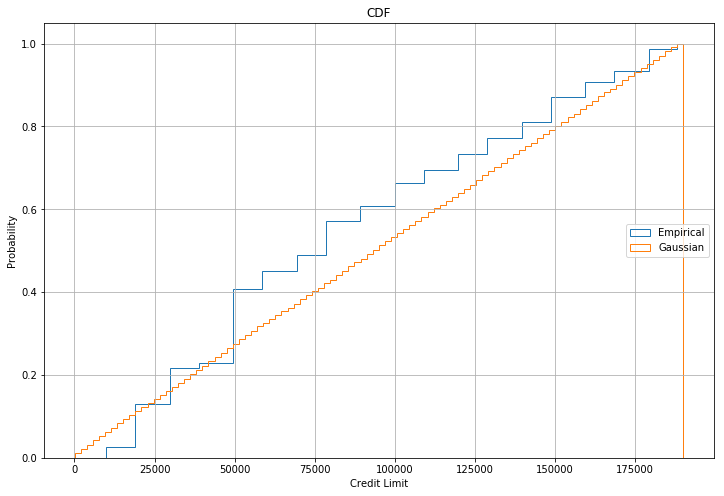

In [23]:
# How does taking out the upper end look like?
# Let's say, upper-income is > $200,000
non_upper = credit_limit.loc[credit_limit < 200000]
credit_limit_normed = np.random.rand(len(non_upper)) * np.max(non_upper)

fig, ax = plt.subplots(figsize=(12, 8))

bins = 100
ax.hist(non_upper, bins=bins, density=True, histtype='step',
        cumulative=True, label='Empirical')
ax.hist(credit_limit_normed, bins=bins, density=True, histtype='step',
        cumulative=True, label='Gaussian')

ax.grid(True)
ax.legend(loc='center right')
ax.set_title('CDF')
ax.set_xlabel('Credit Limit')
ax.set_ylabel('Probability')

plt.show()

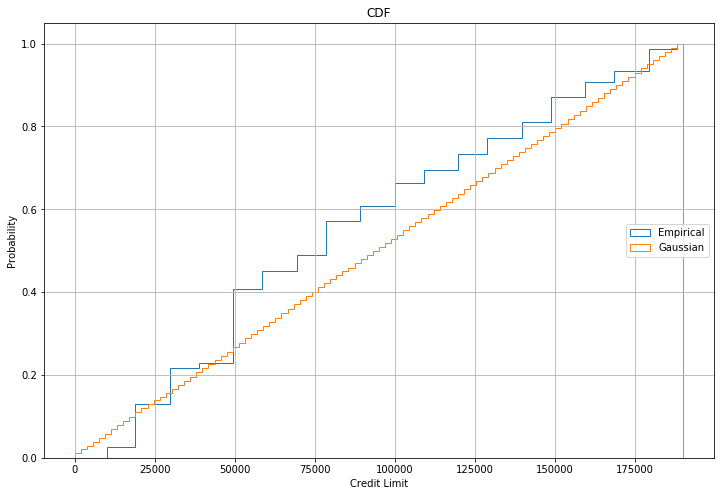

In [24]:
# What about a random sample from our data.
sample = np.random.choice(credit_limit, len(credit_limit), replace=True)
credit_limit_normed = np.random.rand(len(sample)) * np.max(non_upper)

fig, ax = plt.subplots(figsize=(12, 8))

ax.hist(non_upper, bins=bins, density=True, histtype='step',
        cumulative=True, label='Empirical')
ax.hist(credit_limit_normed, bins=bins, density=True, histtype='step',
        cumulative=True, label='Gaussian')

ax.grid(True)
ax.legend(loc='center right')
ax.set_title('CDF')
ax.set_xlabel('Credit Limit')
ax.set_ylabel('Probability')

plt.show()

This visualizations above may factor in our decision to remove outliers for increased predictability. <br>
<p>
    Average of top 5% income earners is ~$300,000 <br>
Source: (https://www.investopedia.com/personal-finance/how-much-income-puts-you-top-1-5-10/)

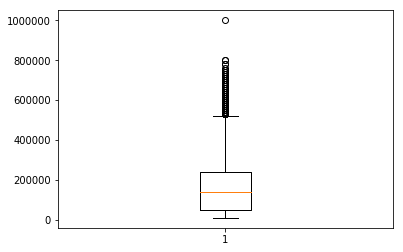

In [25]:
# Scatterplot for better outlier detection
plt.boxplot(credit_limit)
plt.show()